# Clustering

In [2]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 23

In [142]:
df = pd.read_csv('data/x_train.csv')

In [114]:
decode_dict = {'age': (18, 95), 'default': (0, 1), 'balance': (-892.0, 19313.0), 'housing': (0, 1), 'loan': (0, 1), 'day': (1, 31), 'month': (1, 12), 'duration': (8.0, 1531.0), 'campaign': (1.0, 21.0), 'pdays': (-1.0, 392.0), 'previous': (0.0, 12.0), 'job_admin.': (0, 1), 'job_blue-collar': (0, 1), 'job_entrepreneur': (0, 1), 'job_housemaid': (0, 1), 'job_management': (0, 1), 'job_retired': (0, 1), 'job_self-employed': (0, 1), 'job_services': (0, 1), 'job_student': (0, 1), 'job_technician': (0, 1), 'job_unemployed': (0, 1), 'job_unknown': (0, 1), 'marital_divorced': (0, 1), 'marital_married': (0, 1), 'marital_single': (0, 1), 'education_primary': (0, 1), 'education_secondary': (0, 1), 'education_tertiary': (0, 1), 'education_unknown': (0, 1), 'contact_cellular': (0, 1), 'contact_telephone': (0, 1), 'contact_unknown': (0, 1), 'poutcome_failure': (0, 1), 'poutcome_other': (0, 1), 'poutcome_success': (0, 1), 'poutcome_unknown': (0, 1)}

In [5]:
print(decode_dict)

{'age': (18, 95), 'default': (0, 1), 'balance': (-892.0, 19313.0), 'housing': (0, 1), 'loan': (0, 1), 'day': (1, 31), 'month': (1, 12), 'duration': (8.0, 1531.0), 'campaign': (1.0, 21.0), 'pdays': (-1.0, 392.0), 'previous': (0.0, 12.0), 'job_admin.': (0, 1), 'job_blue-collar': (0, 1), 'job_entrepreneur': (0, 1), 'job_housemaid': (0, 1), 'job_management': (0, 1), 'job_retired': (0, 1), 'job_self-employed': (0, 1), 'job_services': (0, 1), 'job_student': (0, 1), 'job_technician': (0, 1), 'job_unemployed': (0, 1), 'job_unknown': (0, 1), 'marital_divorced': (0, 1), 'marital_married': (0, 1), 'marital_single': (0, 1), 'education_primary': (0, 1), 'education_secondary': (0, 1), 'education_tertiary': (0, 1), 'education_unknown': (0, 1), 'contact_cellular': (0, 1), 'contact_telephone': (0, 1), 'contact_unknown': (0, 1), 'poutcome_failure': (0, 1), 'poutcome_other': (0, 1), 'poutcome_success': (0, 1), 'poutcome_unknown': (0, 1)}


In [6]:
df.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
count,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,...,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000
mean,0.297385,0.017831,0.105766,0.556022,0.160347,0.492494,0.467350,0.159173,0.083092,0.096453,...,0.283631,0.151950,0.513678,0.294962,0.039410,0.649196,0.064103,0.105273,0.040132,0.033676
std,0.138661,0.132341,0.108254,0.496863,0.366936,0.277320,0.217746,0.149147,0.127125,0.236212,...,0.450770,0.358981,0.499824,0.456036,0.194572,0.477232,0.244941,0.306911,0.196273,0.180399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.000000,0.047909,0.000000,0.000000,0.233333,0.363636,0.063033,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.000000,0.066568,1.000000,0.000000,0.500000,0.454545,0.112278,0.050000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.389610,0.000000,0.113536,1.000000,0.000000,0.666667,0.636364,0.202232,0.100000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.467532,0.0,0.091908,0.0,0.0,0.833333,0.636364,0.221274,0.15,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.272727,0.0,0.044147,0.0,0.0,0.866667,0.636364,0.091267,0.15,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.059292,0.0,0.0,0.433333,0.636364,0.067630,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.233766,0.0,0.722098,0.0,0.0,0.266667,0.454545,0.084045,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.0,0.057214,1.0,1.0,0.500000,0.454545,0.139199,0.00,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Wizualizacja przy pomocy PCA

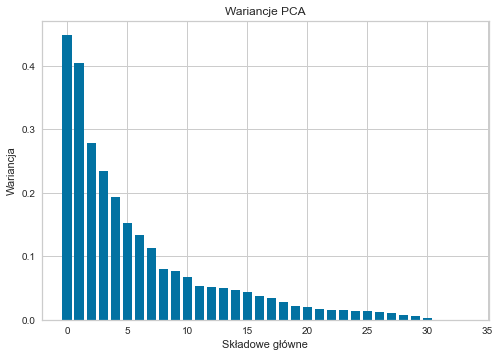

In [22]:
pca = PCA()
pca.fit(df)
variances = pca.explained_variance_
x = np.arange(len(variances))
plt.bar(x, variances)
plt.title('Wariancje PCA')
plt.xlabel('Składowe główne')
plt.ylabel('Wariancja')
plt.show()


In [23]:
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,22152.0,5.569158e-17,0.669752,-1.074667,-0.517615,-0.099112,0.545836,1.512719
col2,22152.0,-5.670898e-18,0.636171,-0.978791,-0.666080,-0.064808,0.448389,1.226466
col3,22152.0,-4.192593e-17,0.527471,-1.061719,-0.357384,-0.053334,0.380686,1.410502


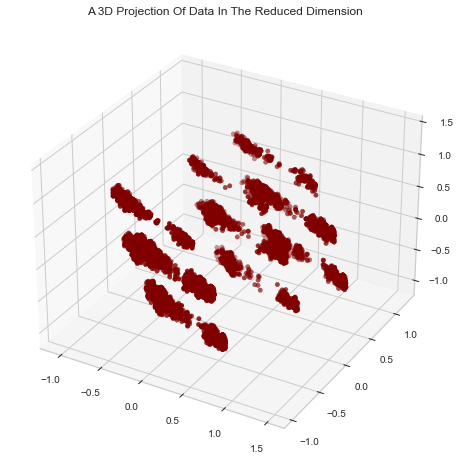

In [24]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

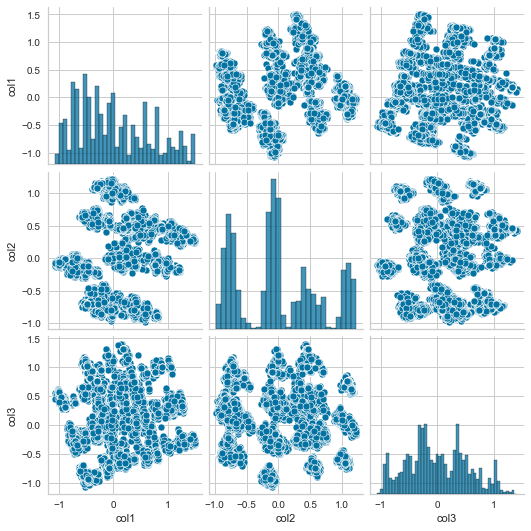

In [25]:
# wykresy zmiennych
df=PCA_ds
sns.pairplot(df)

## Poszukiwanie optymalnej liczby klastrów

In [26]:
def count_clustering_scores(X, cluster_num, model, score_fun):
   
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

### Kmeans

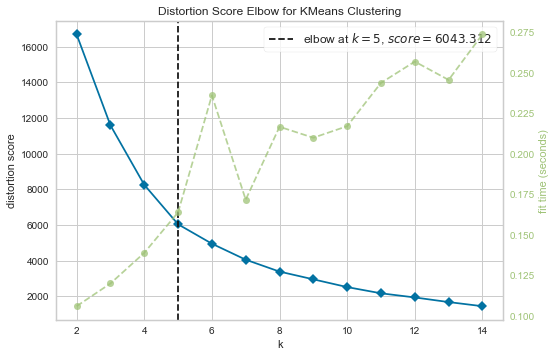

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
Elbow_M = KElbowVisualizer(KMeans(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

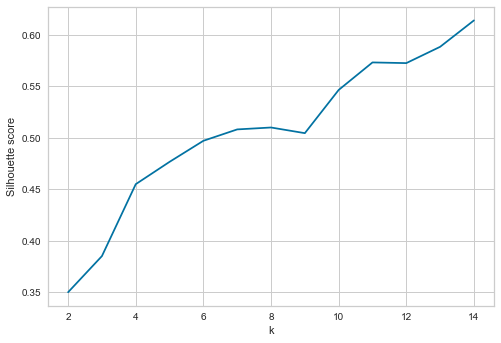

In [28]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 12

### Kmedoids

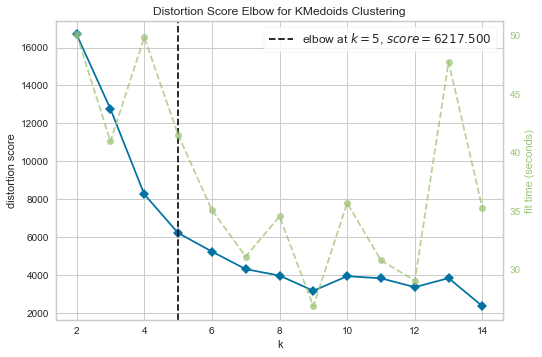

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
Elbow_M = KElbowVisualizer(KMedoids(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

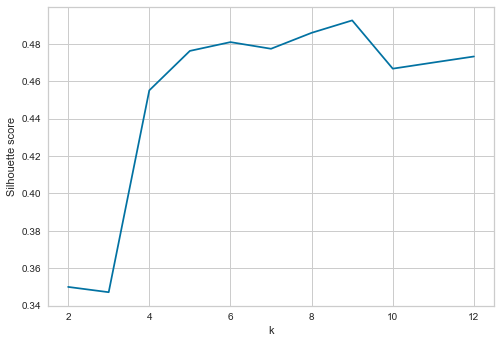

In [30]:
cluster_num_seq = range(2, 13)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMedoids, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 5

### AgglomerativeClustering

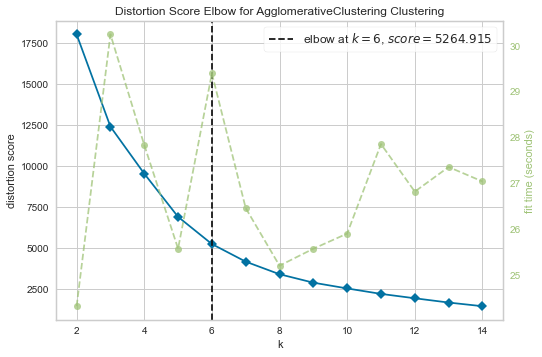

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

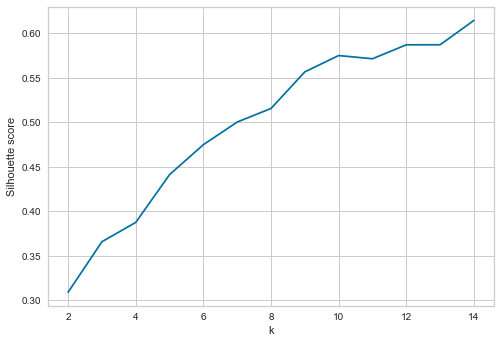

In [32]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 14

### Gap Statistics

In [33]:
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  

Optimal k is:  14


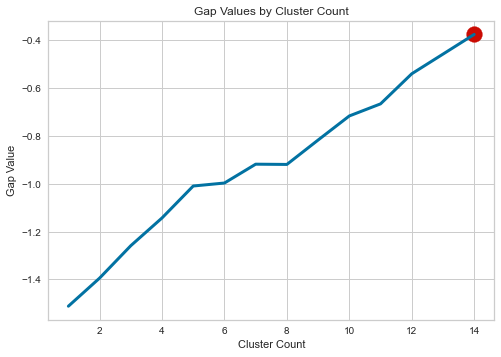

In [34]:
k, gapdf = optimalK(df, nrefs=3, maxClusters=15)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

### Dendogram

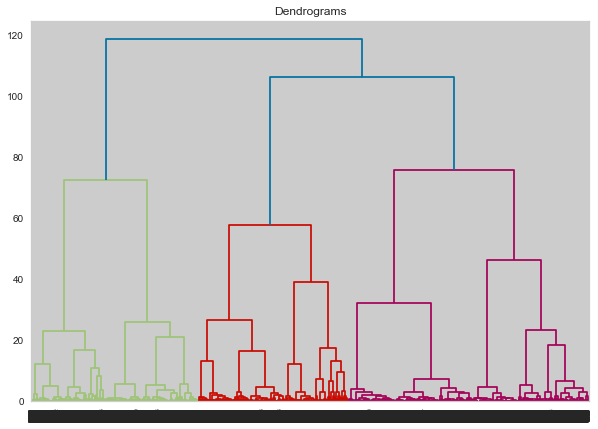

In [35]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### AIC And BIC From GMMs

In [36]:
aic_score = {} 
bic_score = {}

for i in range(1,15): 
  gmm = GaussianMixture(n_components=i, random_state=0).fit(df)
  aic_score[i] = gmm.aic(df)
  bic_score[i] = gmm.bic(df)


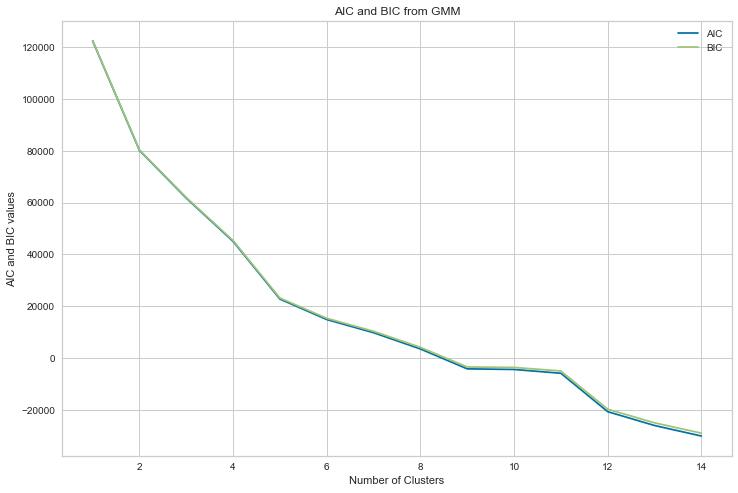

In [37]:
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

In [ ]:
results = [6,5,7,7,5]
median = np.median(results)
median

6.0

# Clusterization

In [38]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(df)

### 1. Kmeans

In [69]:
k = 5 
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)
labels = kmeans.labels_

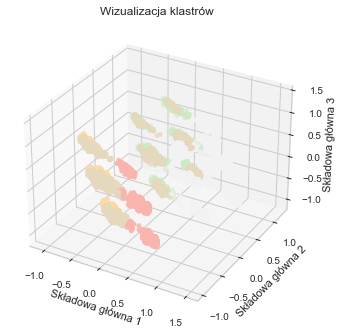

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

In [73]:
df1= df.copy()

df1["Klaster"]=labels
df1.head()
cluster_means = df1.groupby('Klaster').mean()
cluster_means

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
Klaster,,,,,,,,,,,,,,,,,,,,,
0,0.315901,0.013135,0.123700,0.468875,0.155054,0.499838,0.517626,0.155713,0.087864,0.081539,...,0.000000,0.000000,0.000000,0.987150,0.012850,0.759566,0.047687,0.100800,0.037407,0.042547
1,0.238006,0.026588,0.090711,0.608356,0.167335,0.484033,0.436053,0.162958,0.074657,0.110510,...,0.711332,0.000000,0.976155,0.000000,0.023845,0.641908,0.046634,0.111205,0.049589,0.028487
2,0.316711,0.017619,0.102257,0.607048,0.193811,0.497991,0.468719,0.157210,0.085868,0.098368,...,0.000000,0.000000,0.999852,0.000000,0.000148,0.624075,0.069144,0.110749,0.036423,0.031389
3,0.366391,0.014600,0.104350,0.556096,0.136527,0.477117,0.452729,0.156230,0.085143,0.090995,...,0.105533,0.861680,0.000000,0.000000,0.138320,0.511783,0.111424,0.091701,0.034836,0.019467
4,0.241016,0.014448,0.117380,0.467568,0.114971,0.503955,0.473521,0.164993,0.082017,0.094602,...,0.768521,0.000615,0.000000,0.945896,0.053489,0.758069,0.039963,0.106363,0.043345,0.053489


### 2. MiniBatchKMeans

In [41]:
miniBatchKmeans = MiniBatchKMeans(n_clusters= 5)
miniBatchKmeans.fit(df)
labels = miniBatchKmeans.labels_

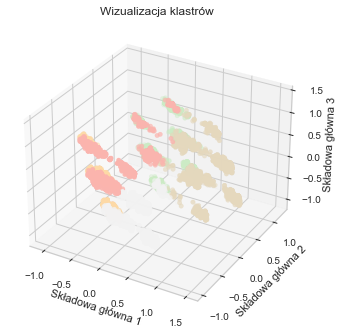

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 3. Agglomerative Clustering

In [43]:
AC = AgglomerativeClustering(n_clusters= 5)
AC.fit(df)
labels = AC.labels_

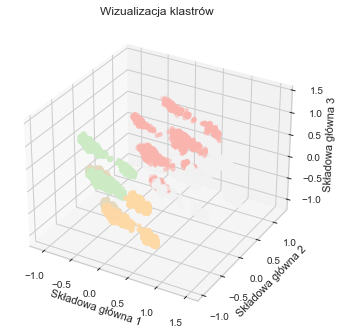

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 4. DBSCAN

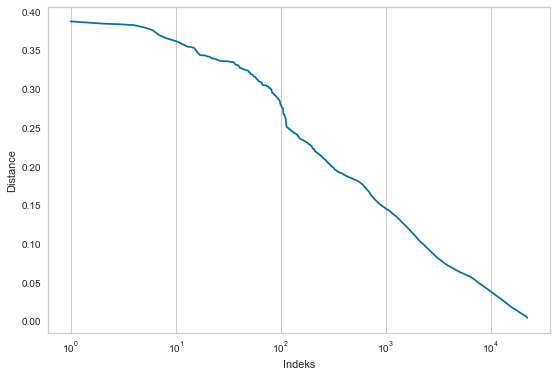

In [45]:
minPts = 68
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks')
plt.ylabel('Distance')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)
plt.xscale('log')
plt.grid(axis='y')
plt.show()

In [46]:
dbs = cluster.DBSCAN(eps=0.33, min_samples= minPts)
dbs.fit(df)
labels = dbs.labels_

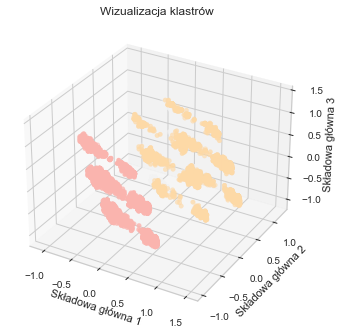

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

Po wstępnej analizie stwierdziliśmy, że najlepiej wypada Agglomerative Clustering

## KMeans - dalsza analiza

Zauważmy, że przeważającą role podczas klasteryzacji pełni praca

In [ ]:
df = pd.read_csv('data/x_train.csv')

In [143]:
def result(df, k, labels):
    result_df = pd.DataFrame(columns=df.columns)
    for cluster in range(5):
        cluster_elements = df[labels == cluster]
        cluster_medians = np.median(cluster_elements, axis=0)
        result_df.loc[cluster]=cluster_medians
    return result_df

def decode(df, prefix, dictionary):

    for column in df.columns:
        if column.startswith(prefix):
            df[column] *= 10/7
        df[column] *= (dictionary[column][1] - dictionary[column][0])
        df[column] += dictionary[column][0]
    return df

def importance_score(df, k, labels):
    n_samples, n_features = df.shape
    importance_df = pd.DataFrame(columns=df.columns)
    cluster_centers = np.zeros((k, n_features))
    for cluster_id in range(k):
        cluster_points = df.iloc[labels == cluster_id]
        cluster_centers[cluster_id] = np.mean(cluster_points, axis=0)

    importance_scores = np.zeros(n_features)
    for i in range(n_samples):
        cluster_center = cluster_centers[labels[i]]
        importance_scores += (df.iloc[i] - cluster_center) ** 2

    importance_scores /= n_samples

    for i, score in enumerate(importance_scores):
        print(f"Importance score for {df.columns[i]}: {score}")
    importance_df.loc[0]=importance_scores
    
    return importance_df

def filter_columns_by_prefix(df, prefix):
    columns_with_prefix = [col for col in df.columns if col.startswith(prefix)]
    return columns_with_prefix

def sum_one_hot_columns(importance_df):
    
    importance_sum = importance_df
    jobs = filter_columns_by_prefix(importance_sum, "job")
    marital = filter_columns_by_prefix(importance_sum, "marital")
    education = filter_columns_by_prefix(importance_sum, "education")
    poutcome = filter_columns_by_prefix(importance_sum, "poutcome")
    importance_sum['job'] = importance_sum[jobs].sum(axis=1)
    importance_sum['marital'] = importance_sum[marital].sum(axis=1)
    importance_sum['education'] = importance_sum[education].sum(axis=1)
    importance_sum['poutcome'] = importance_sum[poutcome].sum(axis=1)
    importance_sum.drop(jobs, axis = 'columns', inplace = True)
    importance_sum.drop(marital, axis = 'columns', inplace = True)
    importance_sum.drop(education, axis = 'columns', inplace = True)
    importance_sum.drop(poutcome, axis = 'columns', inplace = True)
    
    return importance_sum, jobs, marital, education, poutcome

    

In [144]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.467532,0.0,0.091908,0.0,0.0,0.833333,0.636364,0.221274,0.15,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.272727,0.0,0.044147,0.0,0.0,0.866667,0.636364,0.091267,0.15,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.059292,0.0,0.0,0.433333,0.636364,0.067630,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.233766,0.0,0.722098,0.0,0.0,0.266667,0.454545,0.084045,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.0,0.057214,1.0,1.0,0.500000,0.454545,0.139199,0.00,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
AC = AgglomerativeClustering(5)
y = AC.fit_predict(df)
labels = AC.labels_

In [139]:
result_df = result(df,5, labels)
result_df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,34.0,0.0,330.0,1.0,0.0,16.0,5.0,186.0,2.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,41.0,0.0,453.0,1.0,0.0,16.0,6.0,179.0,2.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,44.0,0.0,418.0,1.0,0.0,15.0,6.0,175.0,2.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,34.0,0.0,559.5,0.0,0.0,17.0,6.0,183.5,2.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,40.0,0.0,583.5,0.0,0.0,17.0,7.0,169.0,2.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [140]:
decoded_df = decode(result_df,'job', decode_dict)
#decoded_df = decode(df,'job', decode_dict)
decoded_df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,2636.0,0.0,6666758.0,1.0,0.0,481.0,56.0,283286.0,41.0,-394.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3175.0,0.0,9151973.0,1.0,0.0,481.0,67.0,272625.0,41.0,-394.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3406.0,0.0,8444798.0,1.0,0.0,451.0,67.0,266533.0,41.0,-394.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2636.0,0.0,11303805.5,0.0,0.0,511.0,67.0,279478.5,41.0,-394.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3098.0,0.0,11788725.5,0.0,0.0,511.0,78.0,257395.0,41.0,-394.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [141]:
importance_df = importance_score(df, k, labels)
importance_df.head()
df.head()

Importance score for age: 104.6645398334954
Importance score for default: 0.017498599454133755
Importance score for balance: 4739708.256139968
Importance score for housing: 0.24418424920410078
Importance score for loan: 0.13396281575741958
Importance score for day: 69.1579952414925
Importance score for month: 5.668314850269512
Importance score for duration: 51557.83761136315
Importance score for campaign: 6.45787111830861
Importance score for pdays: 8467.487000880801
Importance score for job_admin.: 0.1968412137885553
Importance score for job_blue-collar: 0.2864200767604261
Importance score for job_entrepreneur: 0.06372239099745494
Importance score for job_housemaid: 0.05381868209267853
Importance score for job_management: 0.21404133780308174
Importance score for job_retired: 0.0932253100732385
Importance score for job_self-employed: 0.06533814820832655
Importance score for job_services: 0.16236255126568577
Importance score for job_student: 0.041276091972129926
Importance score for job

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,54.0,0.0,9.650000e+02,0.0,0.0,26.0,8.0,345.0,4.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,39.0,0.0,-1.818989e-12,0.0,0.0,27.0,8.0,147.0,4.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,36.0,0.0,3.060000e+02,0.0,0.0,14.0,8.0,111.0,2.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,36.0,0.0,1.369800e+04,0.0,0.0,9.0,6.0,136.0,1.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.0,0.0,2.640000e+02,1.0,1.0,16.0,6.0,220.0,1.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
importance_sum, jobs, marital, education, poutcome = sum_one_hot_columns(importance_df)
importance_sum.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,contact_cellular,contact_telephone,job,marital,education,poutcome
0,97.54555,0.017491,4.736213e+06,0.156378,0.134046,69.110802,5.585334,51581.173203,6.451015,8529.722932,0.219431,0.059321,1.50406,0.335788,0.076659,0.16443


Jobs zdecydowanie najbardziej wpływają na klastry zatem zmniejszamy ich wagę

In [120]:
weights = {name: 0.7 for name in jobs}

df_scaled = df.copy()
for column, weight in weights.items():
    df_scaled[column] *= weight

In [121]:
df_scaled.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,54.0,0.0,9.650000e+02,0.0,0.0,26.0,8.0,345.0,4.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,39.0,0.0,-1.818989e-12,0.0,0.0,27.0,8.0,147.0,4.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,36.0,0.0,3.060000e+02,0.0,0.0,14.0,8.0,111.0,2.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,36.0,0.0,1.369800e+04,0.0,0.0,9.0,6.0,136.0,1.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.0,0.0,2.640000e+02,1.0,1.0,16.0,6.0,220.0,1.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
KM2 = KMeans(5)
y2 = KM2.fit_predict(df_scaled)
labels = KM2.labels_

In [123]:
df=df_scaled
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,54.0,0.0,9.650000e+02,0.0,0.0,26.0,8.0,345.0,4.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,39.0,0.0,-1.818989e-12,0.0,0.0,27.0,8.0,147.0,4.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,36.0,0.0,3.060000e+02,0.0,0.0,14.0,8.0,111.0,2.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,36.0,0.0,1.369800e+04,0.0,0.0,9.0,6.0,136.0,1.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.0,0.0,2.640000e+02,1.0,1.0,16.0,6.0,220.0,1.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22147,47.0,0.0,6.770000e+02,0.0,0.0,20.0,8.0,131.0,8.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22148,34.0,0.0,2.230000e+02,1.0,0.0,21.0,5.0,91.0,3.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22149,47.0,0.0,3.100000e+02,1.0,1.0,14.0,8.0,128.0,6.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22150,41.0,0.0,2.361000e+03,0.0,0.0,14.0,5.0,91.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
result_df2 = result(df, 5, labels)
result_df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.233766,0.0,0.073200,0.0,0.0,0.533333,0.545455,0.111622,0.05,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.298701,0.0,0.066568,1.0,0.0,0.500000,0.454545,0.112278,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.350649,0.0,0.065479,1.0,0.0,0.466667,0.454545,0.110965,0.05,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.337662,0.0,0.061643,1.0,0.0,0.533333,0.454545,0.110965,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.181818,0.0,0.061272,1.0,0.0,0.500000,0.363636,0.118188,0.05,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [124]:
#decoded_df2 = decode(result_df2,'job', decode_dict)
decoded_df2 = decode(df,'job', decode_dict)
decoded_df2

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,4176.0,0.0,19496933.0,0.0,0.0,781.0,89.0,525443.0,81.0,-394.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3021.0,0.0,-892.0,0.0,0.0,811.0,89.0,223889.0,81.0,-394.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2790.0,0.0,6181838.0,0.0,0.0,421.0,89.0,169061.0,41.0,-394.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2790.0,0.0,276767198.0,0.0,0.0,271.0,67.0,207136.0,21.0,-394.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2867.0,0.0,5333228.0,1.0,1.0,481.0,67.0,335068.0,21.0,-394.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22147,3637.0,0.0,13677893.0,0.0,0.0,601.0,89.0,199521.0,161.0,-394.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22148,2636.0,0.0,4504823.0,1.0,0.0,631.0,56.0,138601.0,61.0,-394.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22149,3637.0,0.0,6262658.0,1.0,1.0,421.0,89.0,194952.0,121.0,-394.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22150,3175.0,0.0,47703113.0,0.0,0.0,421.0,56.0,138601.0,21.0,-394.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Klaster 0 - grupa z wykształceniem wyzszym, najwyzsze saldo
# Klaster 1 - 
# KLaster 2 - grupa z wykształceniem podstawowym
# KLaster 3
# KLaster 4- 

In [ ]:
importance_df2 = importance_score(df_scaled,5,labels)
importance_df2.head()

Importance score for age: 0.016661090011750736
Importance score for default: 0.01749045663780562
Importance score for balance: 0.011620366075872976
Importance score for housing: 0.24399230096101976
Importance score for loan: 0.13392645377013887
Importance score for day: 0.07683229621234901
Importance score for month: 0.04694828875553855
Importance score for duration: 0.022236186975530814
Importance score for campaign: 0.016142080029341872
Importance score for pdays: 0.05568636009255577
Importance score for job_admin.: 0.04741008228265486
Importance score for job_blue-collar: 0.06977053894202602
Importance score for job_entrepreneur: 0.015325238635705837
Importance score for job_housemaid: 0.012955908473635327
Importance score for job_management: 0.05509381878408417
Importance score for job_retired: 0.022303370435730357
Importance score for job_self-employed: 0.015694473411109827
Importance score for job_services: 0.039102997460731606
Importance score for job_student: 0.0099134181321668

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.016661,0.01749,0.01162,0.243992,0.133926,0.076832,0.046948,0.022236,0.016142,0.055686,...,0.095389,0.031293,0.021455,0.021455,0.031293,0.221668,0.059489,0.094142,0.038226,0.032468


In [ ]:
importance_sum2, jobs, marital, education, poutcome = sum_one_hot_columns(importance_df2)
importance_sum2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,contact_cellular,contact_telephone,job,marital,education,poutcome
0,0.016661,0.01749,0.01162,0.243992,0.133926,0.076832,0.046948,0.022236,0.016142,0.055686,0.221668,0.059489,0.371469,0.222224,0.105497,0.164837


In [ ]:
from collections import Counter

counter = Counter(labels)

for cluster, count in counter.items():
    print("Cluster", cluster, "has", count, "points.")

Cluster 1 has 6916 points.
Cluster 0 has 5799 points.
Cluster 4 has 3118 points.
Cluster 2 has 4239 points.
Cluster 3 has 2080 points.


In [50]:
#Tabelka podsumowująca metody:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN



# Inicjalizacja modeli klastrujących
kmeans = KMeans(5)
mini_batch_kmeans = MiniBatchKMeans(n_clusters=5)
agg_clustering = AgglomerativeClustering(n_clusters=5)
dbscan = DBSCAN(eps=0.33, min_samples= minPts)

# Dopasowanie modeli klastrujących
kmeans.fit(df)
mini_batch_kmeans.fit(df)
agg_clustering.fit(df)
dbscan.fit(df)

# Przewidywanie klastrów
kmeans_labels = kmeans.labels_
mini_batch_kmeans_labels = mini_batch_kmeans.labels_
agg_clustering_labels = agg_clustering.labels_
dbscan_labels = dbscan.labels_

# Metryki oceny klastrów
kmeans_silhouette = silhouette_score(df, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(df, kmeans_labels)
mini_batch_kmeans_silhouette = silhouette_score(df, mini_batch_kmeans_labels)
mini_batch_kmeans_calinski = calinski_harabasz_score(df, mini_batch_kmeans_labels)
agg_clustering_silhouette = silhouette_score(df, agg_clustering_labels)
agg_clustering_calinski = calinski_harabasz_score(df, agg_clustering_labels)
dbscan_silhouette = silhouette_score(df, dbscan_labels)
dbscan_calinski = calinski_harabasz_score(df, dbscan_labels)

# Tworzenie tabeli podsumowującej
data = {
    'Metoda': ['KMeans', 'MiniBatchKMeans', 'Agglomerative Clustering', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, mini_batch_kmeans_silhouette, agg_clustering_silhouette, dbscan_silhouette],
    'Calinski-Harabasz Indedf': [kmeans_calinski, mini_batch_kmeans_calinski, agg_clustering_calinski, dbscan_calinski]
}

summary_table = pd.DataFrame(data)
print(summary_table)


                     Metoda  Silhouette Score  Calinski-Harabasz Indedf
0                    KMeans          0.476583              17426.388434
1           MiniBatchKMeans          0.482724              17012.847388
2  Agglomerative Clustering          0.441293              14514.899637
3                    DBSCAN          0.352487              10170.947278


In [111]:
df['Klaster'] = labels
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,Klaster
0,24760908.0,0.0,7.959467e+15,0.0,0.0,702931.0,10781.0,1.218780e+12,32421.0,-60853300.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
1,17912913.0,0.0,-3.641699e+11,0.0,0.0,729931.0,10781.0,5.193170e+11,32421.0,-60853300.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,16543314.0,0.0,2.523686e+15,0.0,0.0,378931.0,10781.0,3.921419e+11,16421.0,-60853300.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,16543314.0,0.0,1.129880e+17,0.0,0.0,243931.0,8119.0,4.804580e+11,8421.0,-60853300.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,16999847.0,0.0,2.177248e+15,1.0,1.0,432931.0,8119.0,7.772000e+11,8421.0,-60853300.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22147,21565177.0,0.0,5.583891e+15,0.0,0.0,540931.0,10781.0,4.627948e+11,64421.0,-60853300.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
22148,15630248.0,0.0,1.839058e+15,1.0,0.0,567931.0,6788.0,3.214891e+11,24421.0,-60853300.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22149,21565177.0,0.0,2.556680e+15,1.0,1.0,378931.0,10781.0,4.521968e+11,48421.0,-60853300.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
22150,18825979.0,0.0,1.947442e+16,0.0,0.0,378931.0,6788.0,3.214891e+11,8421.0,-60853300.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3


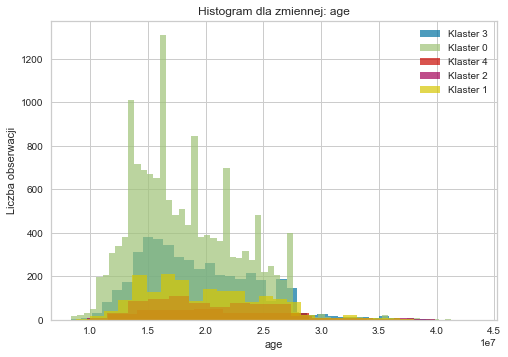

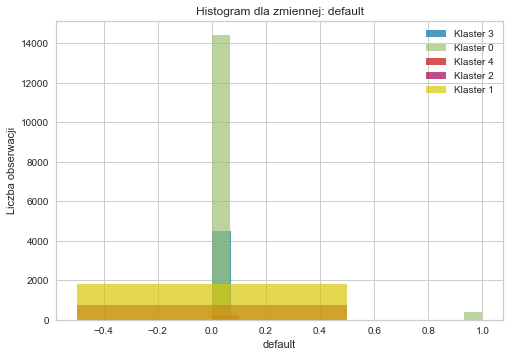

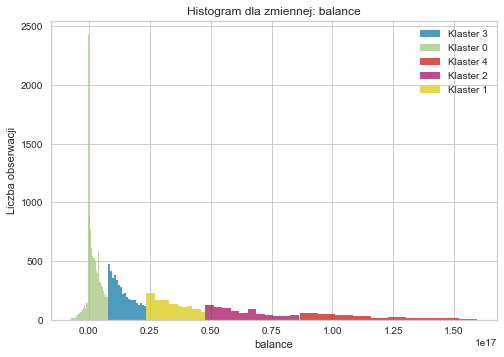

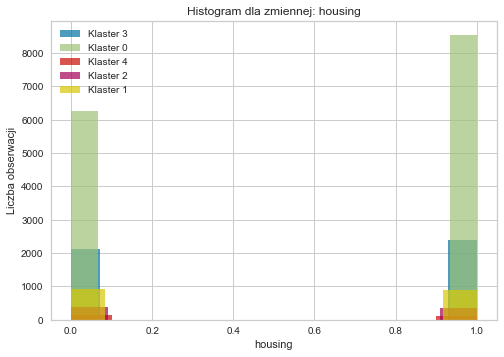

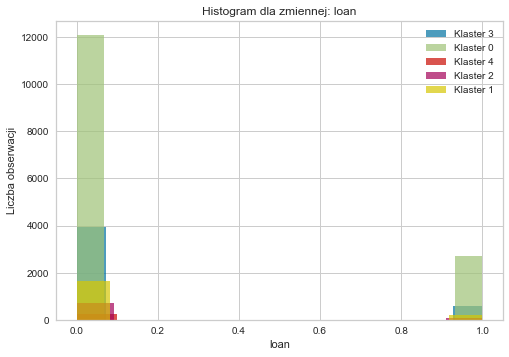

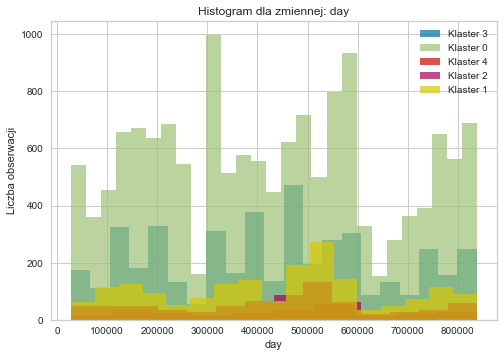

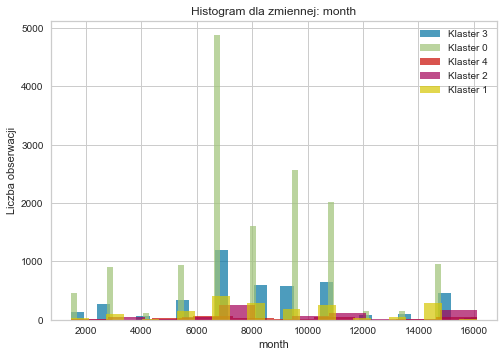

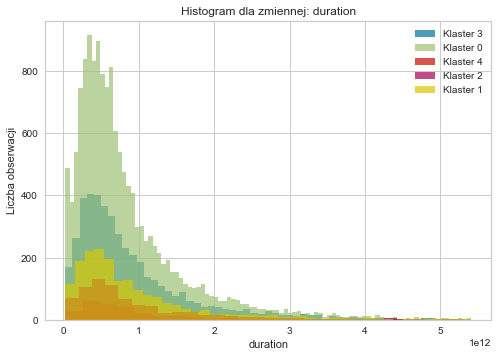

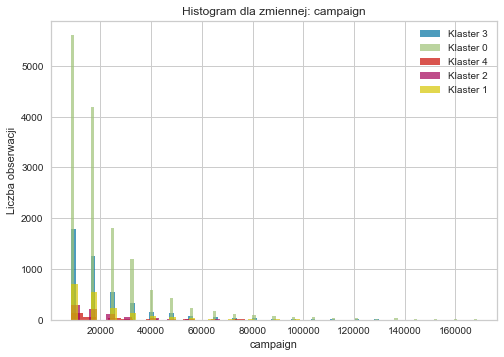

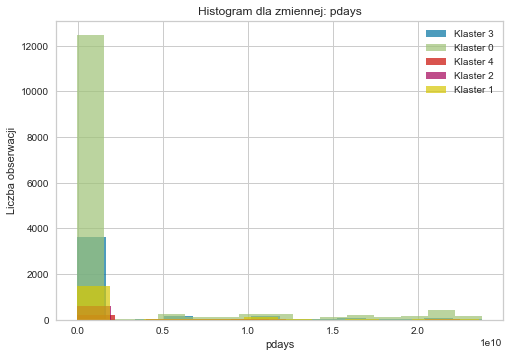

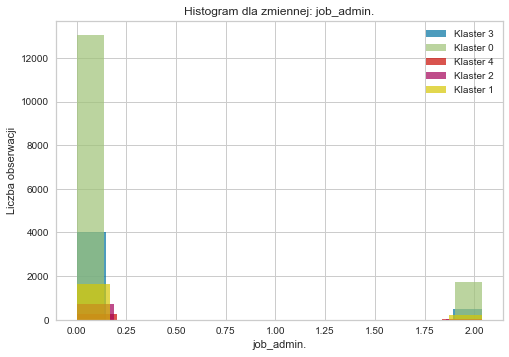

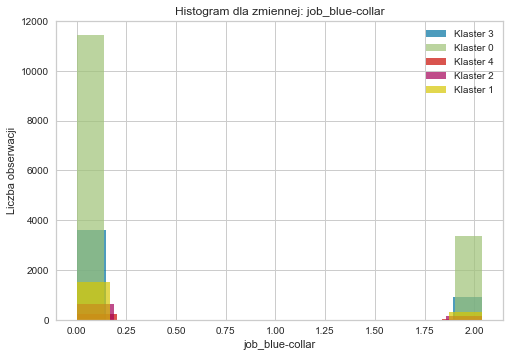

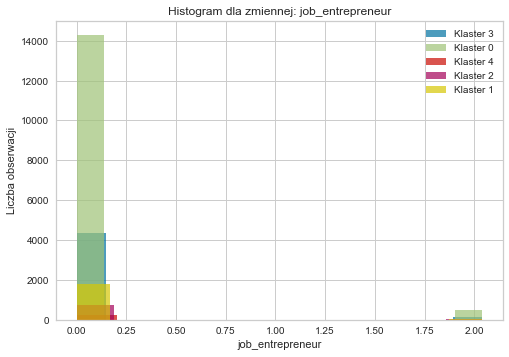

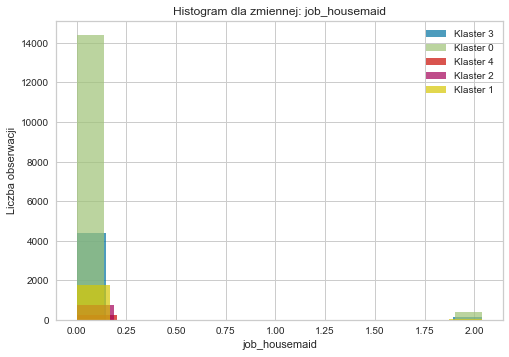

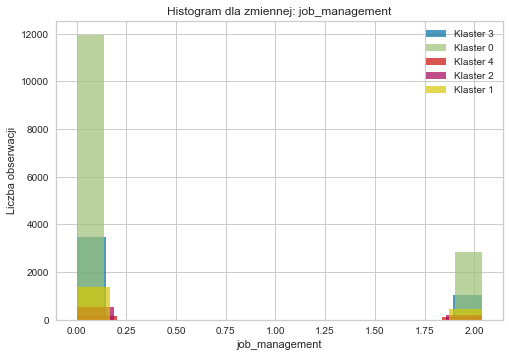

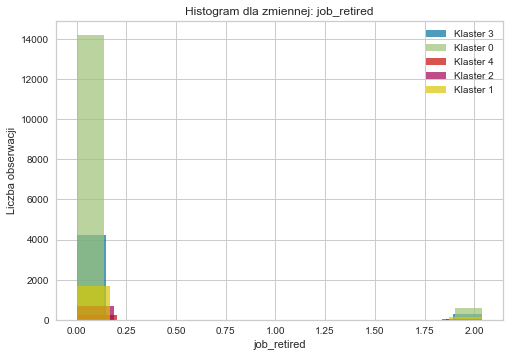

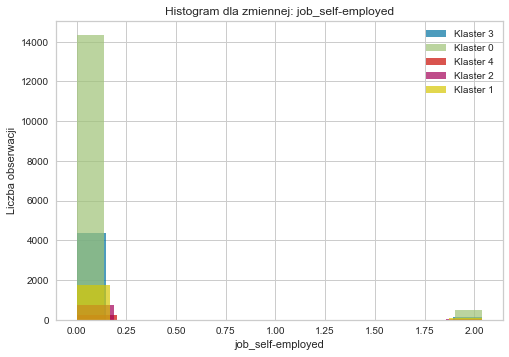

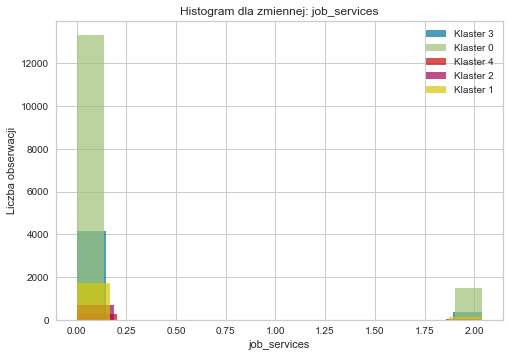

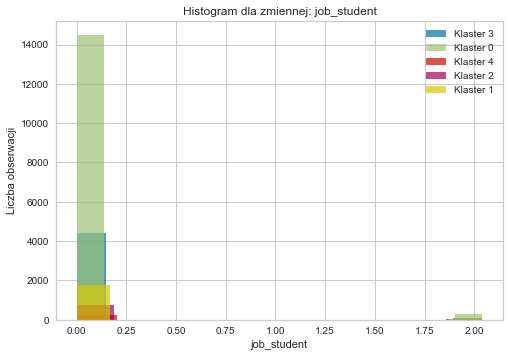

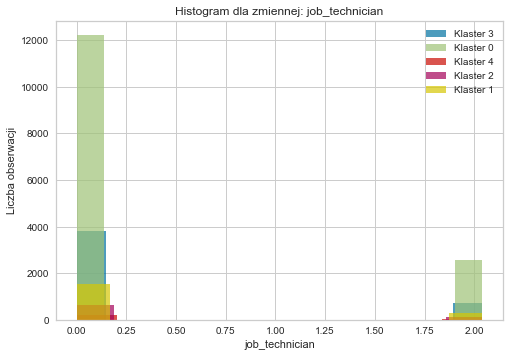

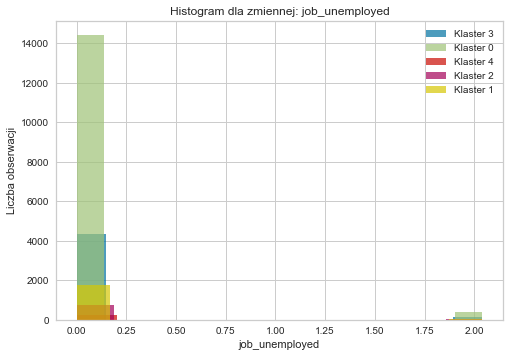

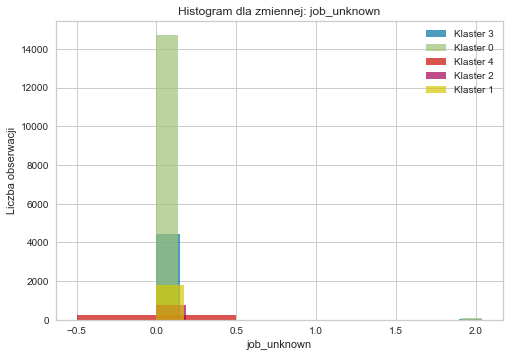

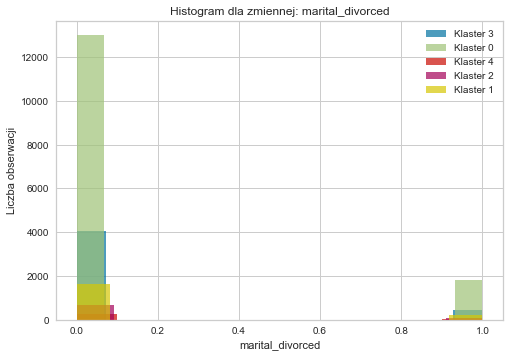

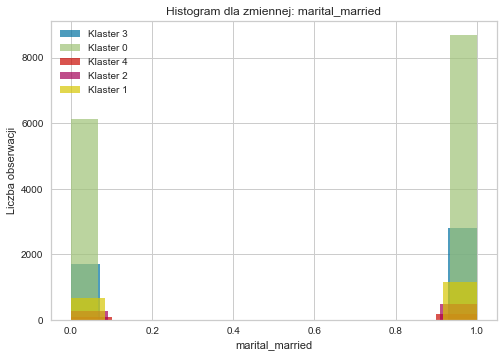

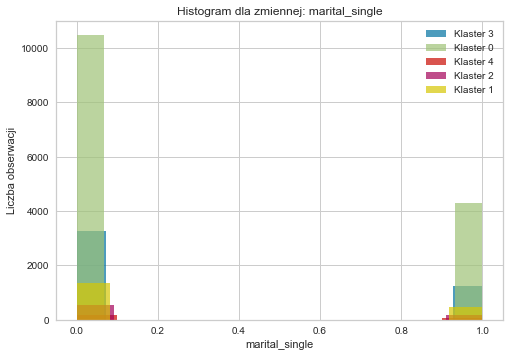

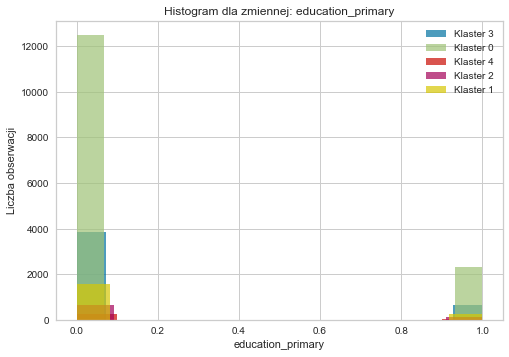

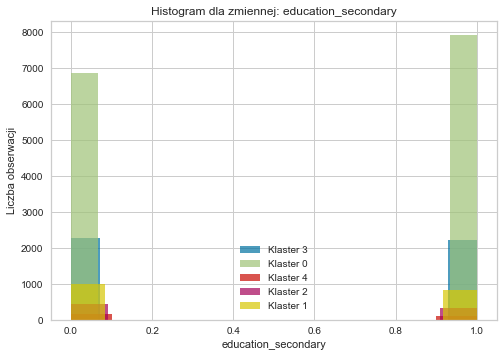

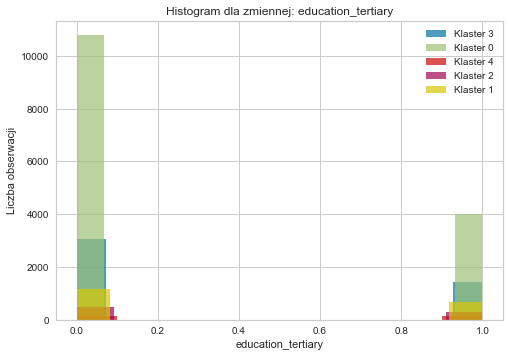

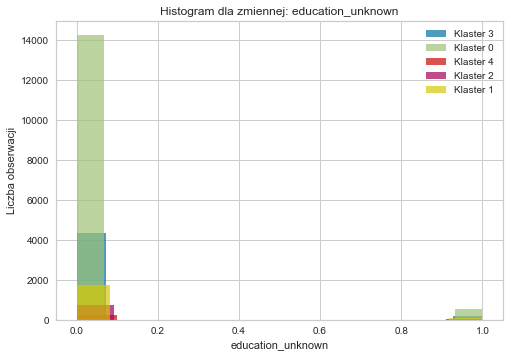

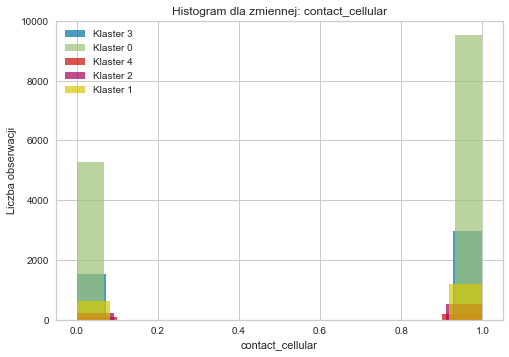

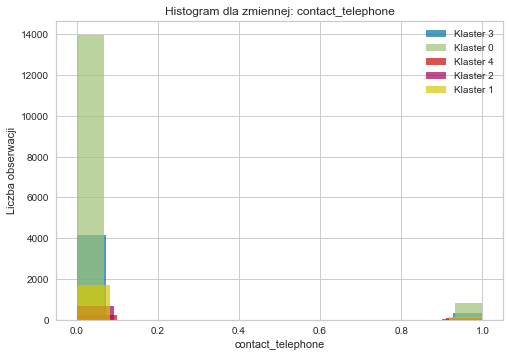

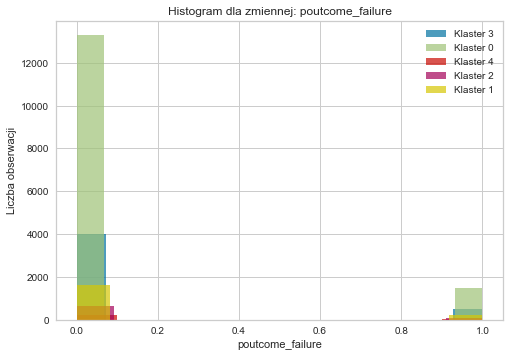

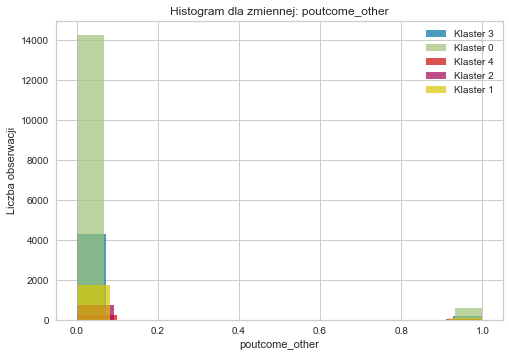

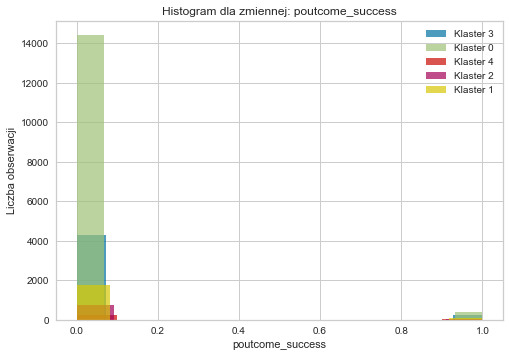

In [110]:
for column in df.columns:
    if column != 'Klaster':
        plt.figure()
        for cluster in df['Klaster'].unique():
            cluster_data = df[df['Klaster'] == cluster][column]
            plt.hist(cluster_data, bins='auto', alpha=0.7, label=f'Klaster {cluster}')
        plt.title(f'Histogram dla zmiennej: {column}')
        plt.xlabel(column)
        plt.ylabel('Liczba obserwacji')
        plt.legend()
        plt.show()